Pandas analysis

In [ ]:
!pip install datasets

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [ ]:
mean_salary = df['salary_year_avg'].mean()
mean_salary

123286.27407182401

In [ ]:
median_salsry = df['salary_year_avg'].median()
median_salsry

115000.0

In [ ]:
avg_hourly_salary = df.groupby('job_title_short')['salary_hour_avg'].mean()
avg_hourly_salary

,salary_hour_avg
job_title_short,
Business Analyst,42.723415
Cloud Engineer,45.560715
Data Analyst,38.106918
Data Engineer,57.196998
Data Scientist,49.361403
Machine Learning Engineer,48.477935
Senior Data Analyst,47.661218
Senior Data Engineer,62.848496
Senior Data Scientist,54.105631


In [ ]:
lowest_avg_hourly_salary = df.groupby('job_title_short')['salary_hour_avg'].min()
lowest_avg_hourly_salary

,salary_hour_avg
job_title_short,
Business Analyst,10.835
Cloud Engineer,18.500
Data Analyst,8.000
Data Engineer,8.000
Data Scientist,8.000
Machine Learning Engineer,10.000
Senior Data Analyst,13.000
Senior Data Engineer,12.500
Senior Data Scientist,17.500


In [ ]:
min_hourly_index = df['salary_hour_avg'].idxmin()
min_hourly_index

88185

In [ ]:
min_hourly_salary = df.iloc[min_hourly_index][['job_title_short', 'salary_hour_avg']]
min_hourly_salary

,88185
job_title_short,Data Scientist
salary_hour_avg,8.0


In [ ]:
job_count_by_country = df.groupby('job_country').size()
job_count_by_country

,0
job_country,
Afghanistan,16
Albania,119
Algeria,111
Angola,11
Argentina,8736
Armenia,289
Australia,12955
Austria,9710
Azerbaijan,83


## Pandas exercise

In [ ]:
nd_jobs = df[df['job_country'] == 'Netherlands']
nd_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
121,Senior Data Engineer,Senior Data Engineer,"Utrecht, Netherlands",via Adzuna,Full-time,False,Netherlands,2023-06-27 13:41:34,False,False,Netherlands,None,NaN,NaN,Data Build Company,"['python', 'scala', 'sql', 'aws', 'azure', 'gc...","{'async': ['jira'], 'cloud': ['aws', 'azure', ..."
160,Data Engineer,Data Engineer Azure,"Almere, Netherlands",via BeBee Nederland,Full-time,False,Netherlands,2023-05-28 13:13:58,True,False,Netherlands,None,NaN,NaN,jouw ITC vacature,['azure'],{'cloud': ['azure']}
211,Data Engineer,Data Engineer,"Eindhoven, Netherlands",via BeBee,Temp work,False,Netherlands,2023-09-19 13:18:05,True,False,Netherlands,None,NaN,NaN,Leap29,"['python', 'sql', 'aws', 'gcp', 'azure', 'kafk...","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
231,Data Analyst,Volume Forecast Data Analyst,"Rotterdam, Netherlands",via WIZBII Jobs,Full-time,False,Netherlands,2023-01-16 14:04:10,True,False,Netherlands,None,NaN,NaN,Unilever,['tableau'],{'analyst_tools': ['tableau']}
250,Data Analyst,Junior Data Analyst,"Amsterdam, Netherlands",via LinkedIn,Full-time,False,Netherlands,2023-01-05 13:36:28,True,False,Netherlands,None,NaN,NaN,Levy Professionals,"['sql', 'sql server', 'excel']","{'analyst_tools': ['excel'], 'databases': ['sq..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785491,Data Analyst,Data Analyst,Netherlands,via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:07:21,True,False,Netherlands,None,NaN,NaN,Personato,None,None
785520,Data Engineer,Azure data engineer,"Utrecht, Netherlands",via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:08:29,True,False,Netherlands,None,NaN,NaN,NS,['azure'],{'cloud': ['azure']}
785521,Software Engineer,Platform Implementation Analyst,"Amsterdam, Netherlands",via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:07:22,False,False,Netherlands,None,NaN,NaN,MSIGHTS,"['excel', 'word', 'powerpoint']","{'analyst_tools': ['excel', 'word', 'powerpoin..."
785524,Data Engineer,ADAS Data Engineer,"Amsterdam, Netherlands",via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:08:29,False,False,Netherlands,None,NaN,NaN,Lucid Motors,"['python', 'c++', 'bash', 'shell', 'aws', 'lin...","{'cloud': ['aws'], 'os': ['linux'], 'other': [..."


In [ ]:
nd_jobs = nd_jobs[nd_jobs['salary_year_avg'].notna()]
nd_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
6525,Business Analyst,Bi Analyst,"Amsterdam, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-01-25 14:04:04,False,False,Netherlands,year,63000.0,NaN,OpenUp,"['sql', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
12647,Senior Data Engineer,Senior Data Engineer - Netherlands,Netherlands,via Ai-Jobs.net,Full-time,False,Netherlands,2023-01-25 14:04:24,False,False,Netherlands,year,147500.0,NaN,Typeform,"['scala', 'python', 'sql', 'aws', 'redshift', ...","{'cloud': ['aws', 'redshift', 'gcp', 'bigquery..."
13350,Data Analyst,Internal Audit Data Analyst,"Amsterdam, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-03-02 13:26:49,False,False,Netherlands,year,53014.0,NaN,Adyen,"['sql', 'python']","{'programming': ['sql', 'python']}"
14724,Data Engineer,Data Engineer,"Zwolle, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-03-01 13:30:22,False,False,Netherlands,year,98283.0,NaN,wehkamp,"['python', 'sql', 'nosql', 'redis', 'elasticse...","{'async': ['jira'], 'cloud': ['databricks', 'a..."
15616,Data Engineer,"Staff Data Engineer, Data & ML Products","Amsterdam, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-05-06 13:31:40,False,False,Netherlands,year,147500.0,NaN,Adevinta,"['java', 'python', 'redis', 'elasticsearch', '...","{'cloud': ['gcp', 'aws'], 'databases': ['redis..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736375,Data Scientist,Data Science Lead,"Eindhoven, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-02-24 21:43:01,False,False,Netherlands,year,105300.0,NaN,Blend360,"['r', 'python']","{'programming': ['r', 'python']}"
753000,Data Scientist,Data Scientist (L5) - Regional Product & Partn...,"Amsterdam, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-02-14 20:42:37,False,False,Netherlands,year,157500.0,NaN,Netflix,"['sql', 'python']","{'programming': ['sql', 'python']}"
753233,Data Engineer,"DataOps Engineer, Streaming","Amsterdam, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-05-17 20:38:24,True,False,Netherlands,year,89100.0,NaN,Adyen,"['python', 'cassandra', 'kafka', 'spark', 'lin...","{'databases': ['cassandra'], 'libraries': ['ka..."
770887,Machine Learning Engineer,Machine Learning Ops Engineer,"Utrecht, Netherlands",via Ai-Jobs.net,Full-time,False,Netherlands,2023-05-02 01:22:07,False,False,Netherlands,year,72900.0,NaN,Magno IT Recruitment,"['python', 'bash', 'azure', 'databricks', 'air...","{'cloud': ['azure', 'databricks'], 'libraries'..."


In [ ]:
nd_jobs.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

,salary_year_avg
job_title_short,
Senior Data Engineer,137420.000000
Data Scientist,135382.647059
Machine Learning Engineer,126537.500000
Senior Data Scientist,125966.666667
Senior Data Analyst,111175.000000
Software Engineer,110433.333333
Data Engineer,107600.652174
Data Analyst,98278.025000
Business Analyst,85800.000000


In [ ]:
nd_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count']).sort_values(by='median',ascending=False)

,median,min,max,count
job_title_short,,,,
Data Scientist,157500.0,89100.0,170575.0,17
Senior Data Engineer,147500.0,89100.0,155500.0,5
Senior Data Scientist,147500.0,72900.0,157500.0,3
Machine Learning Engineer,122800.0,69000.0,225000.0,12
Senior Data Analyst,111175.0,111175.0,111175.0,1
Data Engineer,97444.0,89100.0,175000.0,23
Data Analyst,93852.0,53014.0,177283.0,20
Business Analyst,89100.0,63000.0,105300.0,3
Software Engineer,89100.0,56700.0,185500.0,3


In [ ]:
nd_jobs.groupby('job_title_short').size().sort_values(ascending=False)

,0
job_title_short,
Data Engineer,23
Data Analyst,20
Data Scientist,17
Machine Learning Engineer,12
Senior Data Engineer,5
Business Analyst,3
Senior Data Scientist,3
Software Engineer,3
Senior Data Analyst,1


# Matplotlib intro

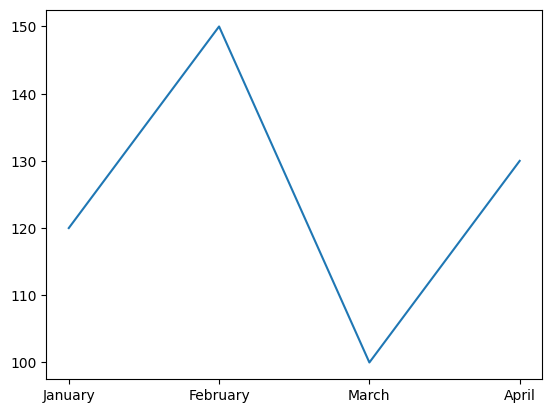

In [ ]:
import matplotlib.pyplot as plt


months = ['January', 'February', 'March', 'April']
postings = [120, 150, 100, 130]

plt.plot(months, postings)
plt.show()

<BarContainer object of 4 artists>

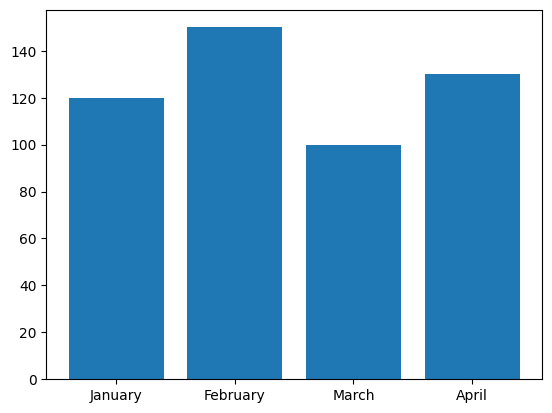

In [ ]:
months = ['January', 'February', 'March', 'April']
postings = [120, 150, 100, 130]

plt.bar(months, postings)

# Matplotlib plotting

In [ ]:
job_country = df['job_country'].value_counts().head(10).sort_values(ascending=True)
job_country

,count
job_country,
Italy,17013
Netherlands,20631
Sudan,21781
Singapore,23696
Spain,25100
Germany,27694
France,39922
United Kingdom,40375
India,51088


<BarContainer object of 10 artists>

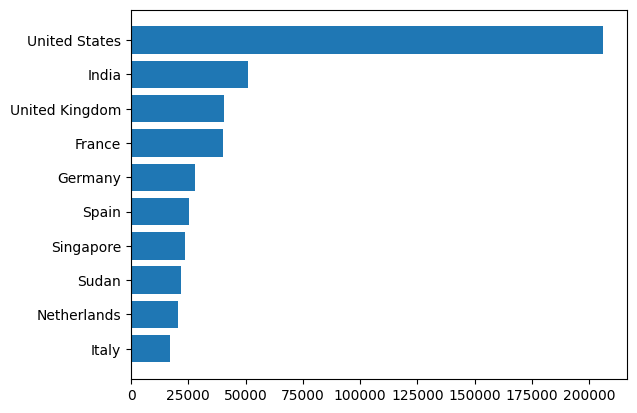

In [ ]:
plt.barh(job_country.index, job_country.values)

In [ ]:
average_salary = df.groupby('job_title_short')['salary_year_avg'].mean()
average_salary

,salary_year_avg
job_title_short,
Business Analyst,91082.612833
Cloud Engineer,111268.453846
Data Analyst,93841.907854
Data Engineer,130125.604250
Data Scientist,135988.837171
Machine Learning Engineer,126774.315972
Senior Data Analyst,113911.363665
Senior Data Engineer,145840.611624
Senior Data Scientist,154206.292996


In [ ]:
average_salary = average_salary.sort_values(ascending=True)

<BarContainer object of 10 artists>

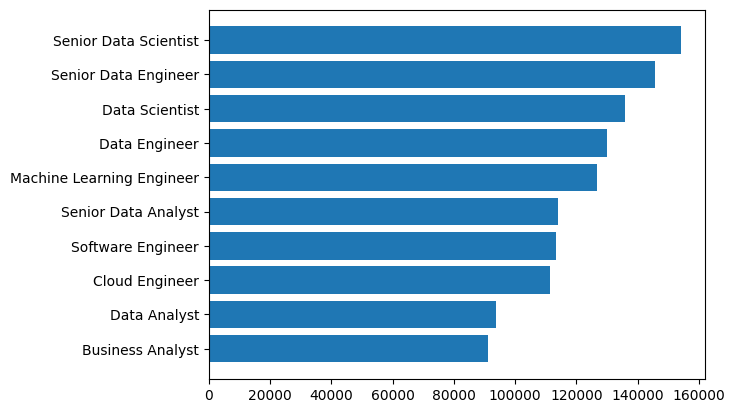

In [ ]:
plt.barh(average_salary.index, average_salary.values)

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [ ]:
monthly_avg_sal = df.groupby('job_posted_month')['salary_year_avg'].mean().sort_index()

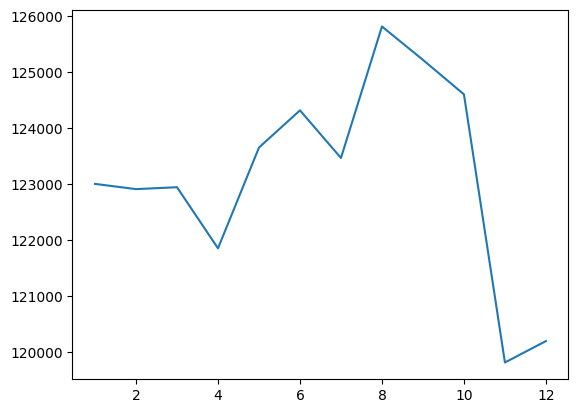

In [ ]:
plt.plot(monthly_avg_sal.index, monthly_avg_sal.values)

# Matplotlib labeling

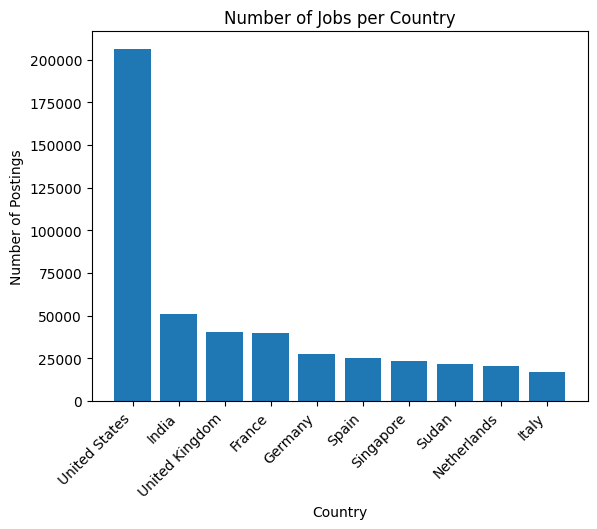

In [ ]:
job_country = df['job_country'].value_counts().head(10).sort_values(ascending=False)
job_country

plt.bar(job_country.index, job_country.values)
plt.title('Number of Jobs per Country')
plt.ylabel('Number of Postings')
plt.xlabel('Country')
plt.xticks(rotation=45, ha=r'right')
plt.show()

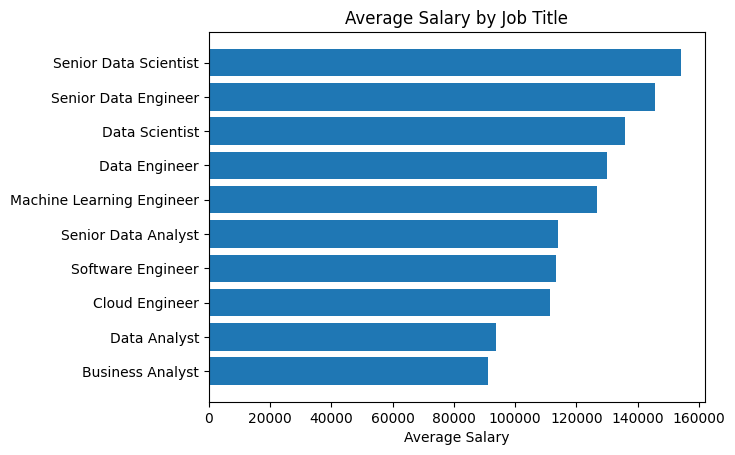

In [ ]:

average_salary = df.groupby('job_title_short')['salary_year_avg'].mean()

average_salary = average_salary.sort_values(ascending=True)

plt.barh(average_salary.index, average_salary.values)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.show()

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.month

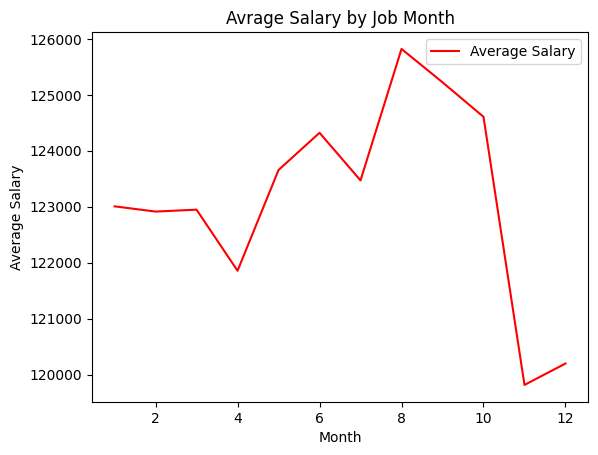

In [ ]:
monthly_avg_sal = df.groupby('job_posted_month')['salary_year_avg'].mean().sort_index()

plt.plot(monthly_avg_sal.index, monthly_avg_sal.values, color='red', label = 'Average Salary')
plt.title('Avrage Salary by Job Month')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.show()

In [ ]:
job_counts = df['job_via'].value_counts().head(5)
job_counts

,count
job_via,
via LinkedIn,186679
via BeBee,103507
via Trabajo.org,61562
via Indeed,42756
via Recruit.net,23646


<Axes: xlabel='job_via'>

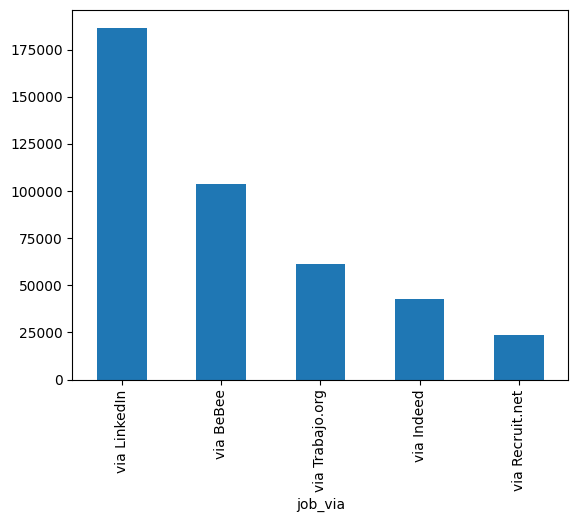

In [ ]:
job_counts.plot(kind='bar')

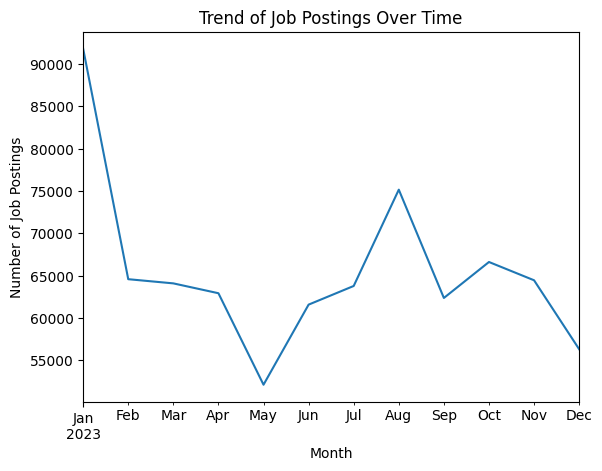

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
monthly_job_counts = df['job_posted_month'].value_counts().sort_index()
monthly_job_counts.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Trend of Job Postings Over Time')
plt.show()

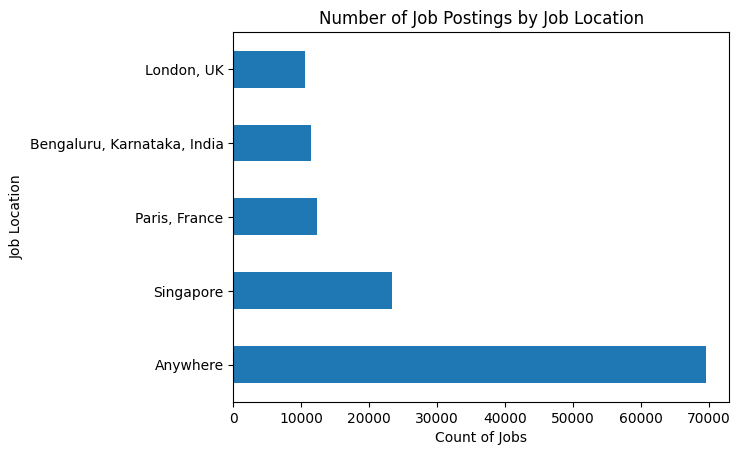

In [ ]:
location_counts = df['job_location'].value_counts().head(5)
location_counts.plot(kind='barh')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Location')
plt.title('Number of Job Postings by Job Location')
plt.show()